<a href="https://colab.research.google.com/github/rohskopf/FitSNAP/blob/custom-networks/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The FitSNAP-LAMMPS ecosystem for training & using potentials


*   We will keep this Colab notebook updated as the code changes. Please refer to it for future use.
*   We have GPU access on Colab, but it is unreliable for PyTorch (at least the way we set things up in this tutorial).

# Setup environment

In [1]:
!which python
!python --version

/usr/local/bin/python
Python 3.7.14


Setup environment with all these commands:

In [2]:
!apt install -y cmake build-essential git ccache openmpi-bin libopenmpi-dev python3.7-venv
%cd /content
!rm -rf lammps
!git clone https://github.com/lammps/lammps.git lammps
%cd /content/lammps
!rm -rf build
!mkdir build
%cd build
!cmake ../cmake -DLAMMPS_EXCEPTIONS=yes \
               -DBUILD_SHARED_LIBS=yes \
               -DMLIAP_ENABLE_PYTHON=yes \
               -DPKG_PYTHON=yes \
               -DPKG_ML-SNAP=yes \
               -DPKG_ML-IAP=yes \
               -DPKG_ML-PACE=yes \
               -DPKG_SPIN=yes \
               -DPYTHON_EXECUTABLE:FILEPATH=`which python`
!make -j 2
!make install-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
libopenmpi-dev is already the newest version (2.1.1-8).
openmpi-bin is already the newest version (2.1.1-8).
openmpi-bin set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
git is already the newest version (1:2.17.1-1ubuntu0.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  distcc
The following NEW packages will be installed:
  ccache python3.7-venv
0 upgraded, 2 newly installed, 0 to remove and 12 not upgraded.
Need to get 2,626 kB of archives.
After this operation, 3,059 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 ccache amd64 3.4.1-1 [110 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.7-venv

In [3]:
import lammps
lmp = lammps.lammps()
print(lmp)

If no errors, we're good to!

# Get FitSNAP

In [4]:
%cd /content
!rm -rf FitSNAP
!git clone -b custom-networks https://github.com/rohskopf/FitSNAP #https://github.com/FitSNAP/FitSNAP
# Set environment variables
!$PYTHONPATH
%env PYTHONPATH=/env/python:/bin/bash:/content/FitSNAP
%env LD_LIBRARY_PATH=/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/content/lammps/build
!cp -r FitSNAP/fitsnap3lib /usr/lib/python3.7/fitsnap3lib

/content
Cloning into 'FitSNAP'...
remote: Enumerating objects: 35746, done.
remote: Counting objects: 100% (2705/2705), done.
remote: Compressing objects: 100% (1038/1038), done.
remote: Total 35746 (delta 1702), reused 2549 (delta 1634), pack-reused 33041
Receiving objects: 100% (35746/35746), 215.08 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (15343/15343), done.
Checking out files: 100% (30589/30589), done.
/bin/bash: /env/python: No such file or directory
env: PYTHONPATH=/env/python:/bin/bash:/content/FitSNAP
env: LD_LIBRARY_PATH=/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/content/lammps/build


In [ ]:
!/usr/lib/python3.7/fitsnap3lib

/bin/bash: /usr/lib/python3.7/fitsnap3lib: Is a directory


### Stay updated with the newest version

In [5]:
%cd /content/FitSNAP
!git fetch
!git pull
#!git reset --hard origin/custom-networks
#!cp -r fitsnap3lib /usr/lib/python3.7/fitsnap3lib

/content/FitSNAP
Already up to date.


# Fit linear SNAP for tantalum



*   We start with running FitSNAP as an executable. 
*   The general command is `mpirun -np P python -m fitsnap3 input.in`
*   We will do serial execution in this tutorial because `mpirun` is buggy on Colab.



In [6]:
%cd /content/FitSNAP/examples/Ta_Linear_JCP2014
!python -m fitsnap3 Ta-example.in --overwrite

/content/FitSNAP/examples/Ta_Linear_JCP2014

    ______ _  __  _____  _   __ ___     ____  
   / ____/(_)/ /_/ ___/ / | / //   |   / __ \ 
  / /_   / // __/\__ \ /  |/ // /| |  / /_/ /
 / __/  / // /_ ___/ // /|  // ___ | / ____/ 
/_/    /_/ \__//____//_/ |_//_/  |_|/_/      

-----23Sep22------
Reading input...
Finished reading input
------------------
No mpi4py detected, using fitsnap stubs...
numpy version:  1.21.6
scipy version:  1.7.3
pandas version:  1.3.5
LAMMPS (15 Sep 2022)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
-----------
Total wall time: 0:00:00
Using LAMMPSSNAP as FitSNAP calculator
Displaced_A15 : Detected  9  fitting on  9  testing on  0
Displaced_BCC : Detected  9  fitting on  9  testing on  0
Displaced_FCC : Detected  9  fitting on  9  testing on  0
Elastic_BCC : Detected  100  fitting on  100  testing on  0
Elastic_FCC : Detected  100  fitting on  100  testing on  0
GSF_110 : Detected  

Look at the output

In [7]:
!ls

20May21_Standard      FitSNAP.df  Ta-example.in		Ta_pot.snapparam
anl		      JSON	  Ta-example-nodump.in	Test_Set_Example
compare_snapcoeff.py  log.lammps  Ta_metrics.md		Truth-Ref.npy
Descriptors.npy       README.md   Ta_pot.snapcoeff	Weights.npy


Linear models output a Pandas dataframe `FitSNAP.df`, which has information about the fit. 

Errors are included in `Ta_metrics.md` for each group, but we can also use the FitSNAP library to help us process/analyze the dataframe.


In [8]:
# Import FitSNAP library tools for dataframe analysis
%cd /content/FitSNAP/examples/Ta_Linear_JCP2014 
import os
os.environ['PYTHONPATH']
from fitsnap3lib.tools.dataframe_tools import DataframeTools
from fitsnap3lib.io.input import Config
config = Config(arguments_lst = ["Ta-example.in", "--overwrite"])

/content/FitSNAP/examples/Ta_Linear_JCP2014


Let's look at what's in the dataframe:

*   First 31 columns are the SNAP bispectrum components used in the fitting matrix.
*   `truths` are the target values (e.g. energy, force, stress)
*   `preds` are the model values
*   `weights` are the user-defined weighting factors
*   `Groups` designate which user-defined group this row belongs to
*   `Configs` are the filenames associated with particular rows
*   `Row_Type` tells which rows are `Energy`, `Force`, or `Stress` rows
*   `Atom_I` is the atom index associated with a row
*   `Testing` are bools designating which rows are used for testing (not training)
*   `Atom_Type` designate which `Force` rows belong to a certain atom type



In [9]:
dataframe_tool = DataframeTools("FitSNAP.df")
df = dataframe_tool.read_dataframe()
print(df.columns)

Index([          0,           1,           2,           3,           4,
                 5,           6,           7,           8,           9,
                10,          11,          12,          13,          14,
                15,          16,          17,          18,          19,
                20,          21,          22,          23,          24,
                25,          26,          27,          28,          29,
                30,    'truths',     'preds',   'weights',    'Groups',
         'Configs',  'Row_Type',    'Atom_I',   'Testing', 'Atom_Type'],
      dtype='object')


In [10]:
mae_energy_total = dataframe_tool.calc_error("Energy", "Training")
mae_force_total = dataframe_tool.calc_error("Force", "Training")
print(f"{mae_energy_total} {mae_force_total}")

0.11278674722618488 0.07575757670459717


In [11]:
mae_energy = dataframe_tool.calc_error("Energy", "Training", "Volume_BCC")
mae_force = dataframe_tool.calc_error("Force", "Training", "Volume_BCC")
print(f"{mae_energy} {mae_force}")

0.32859811817490936 3.856080502920254e-15


In [14]:
print(f"{'Group':15} {'Energy MAE':3} {'Force MAE':3}")
for group in config.sections['GROUPS'].group_table:
    mae_energy_group = dataframe_tool.calc_error("Energy", "Training", group)
    mae_force_group = dataframe_tool.calc_error("Force", "Training", group)
    print(f"{group:15} {mae_energy_group:.3e} {mae_force_group:.3e}")

Group           Energy MAE Force MAE
Displaced_A15   2.358e-03 9.806e-02
Displaced_BCC   1.884e-03 1.434e-01
Displaced_FCC   6.167e-04 5.741e-02
Elastic_BCC     6.411e-03 7.272e-05
Elastic_FCC     3.618e-03 9.642e-05
GSF_110         6.524e-03 2.650e-02
GSF_112         8.684e-03 5.698e-02
Liquid          5.668e-03 3.538e-01
Surface         1.352e-02 4.760e-02
Volume_A15      2.458e-01 4.645e-15
Volume_BCC      3.286e-01 3.856e-15
Volume_FCC      8.121e-01 3.256e-15


FitSNAP library has built-in tools for plotting dataframe quantities.

`dataframe_tools.plot_agreement(quantity="Energy", fitting_set="Training", legend=True, mode="Distribution")`

Sometimes it's useful to plot the data to see what the outliers are.

Displaced_A15


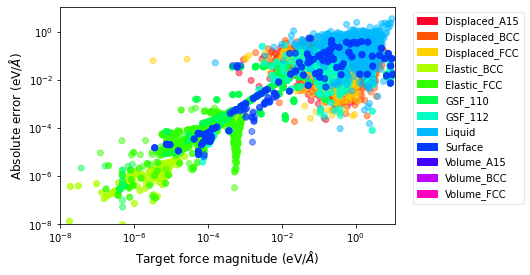

In [21]:
dataframe_tool.plot_agreement("Force", fitting_set="Training", mode="Distribution")

Better way to view images in Colab:

In [17]:
from IPython.display import Image
Image('energy_agreement.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

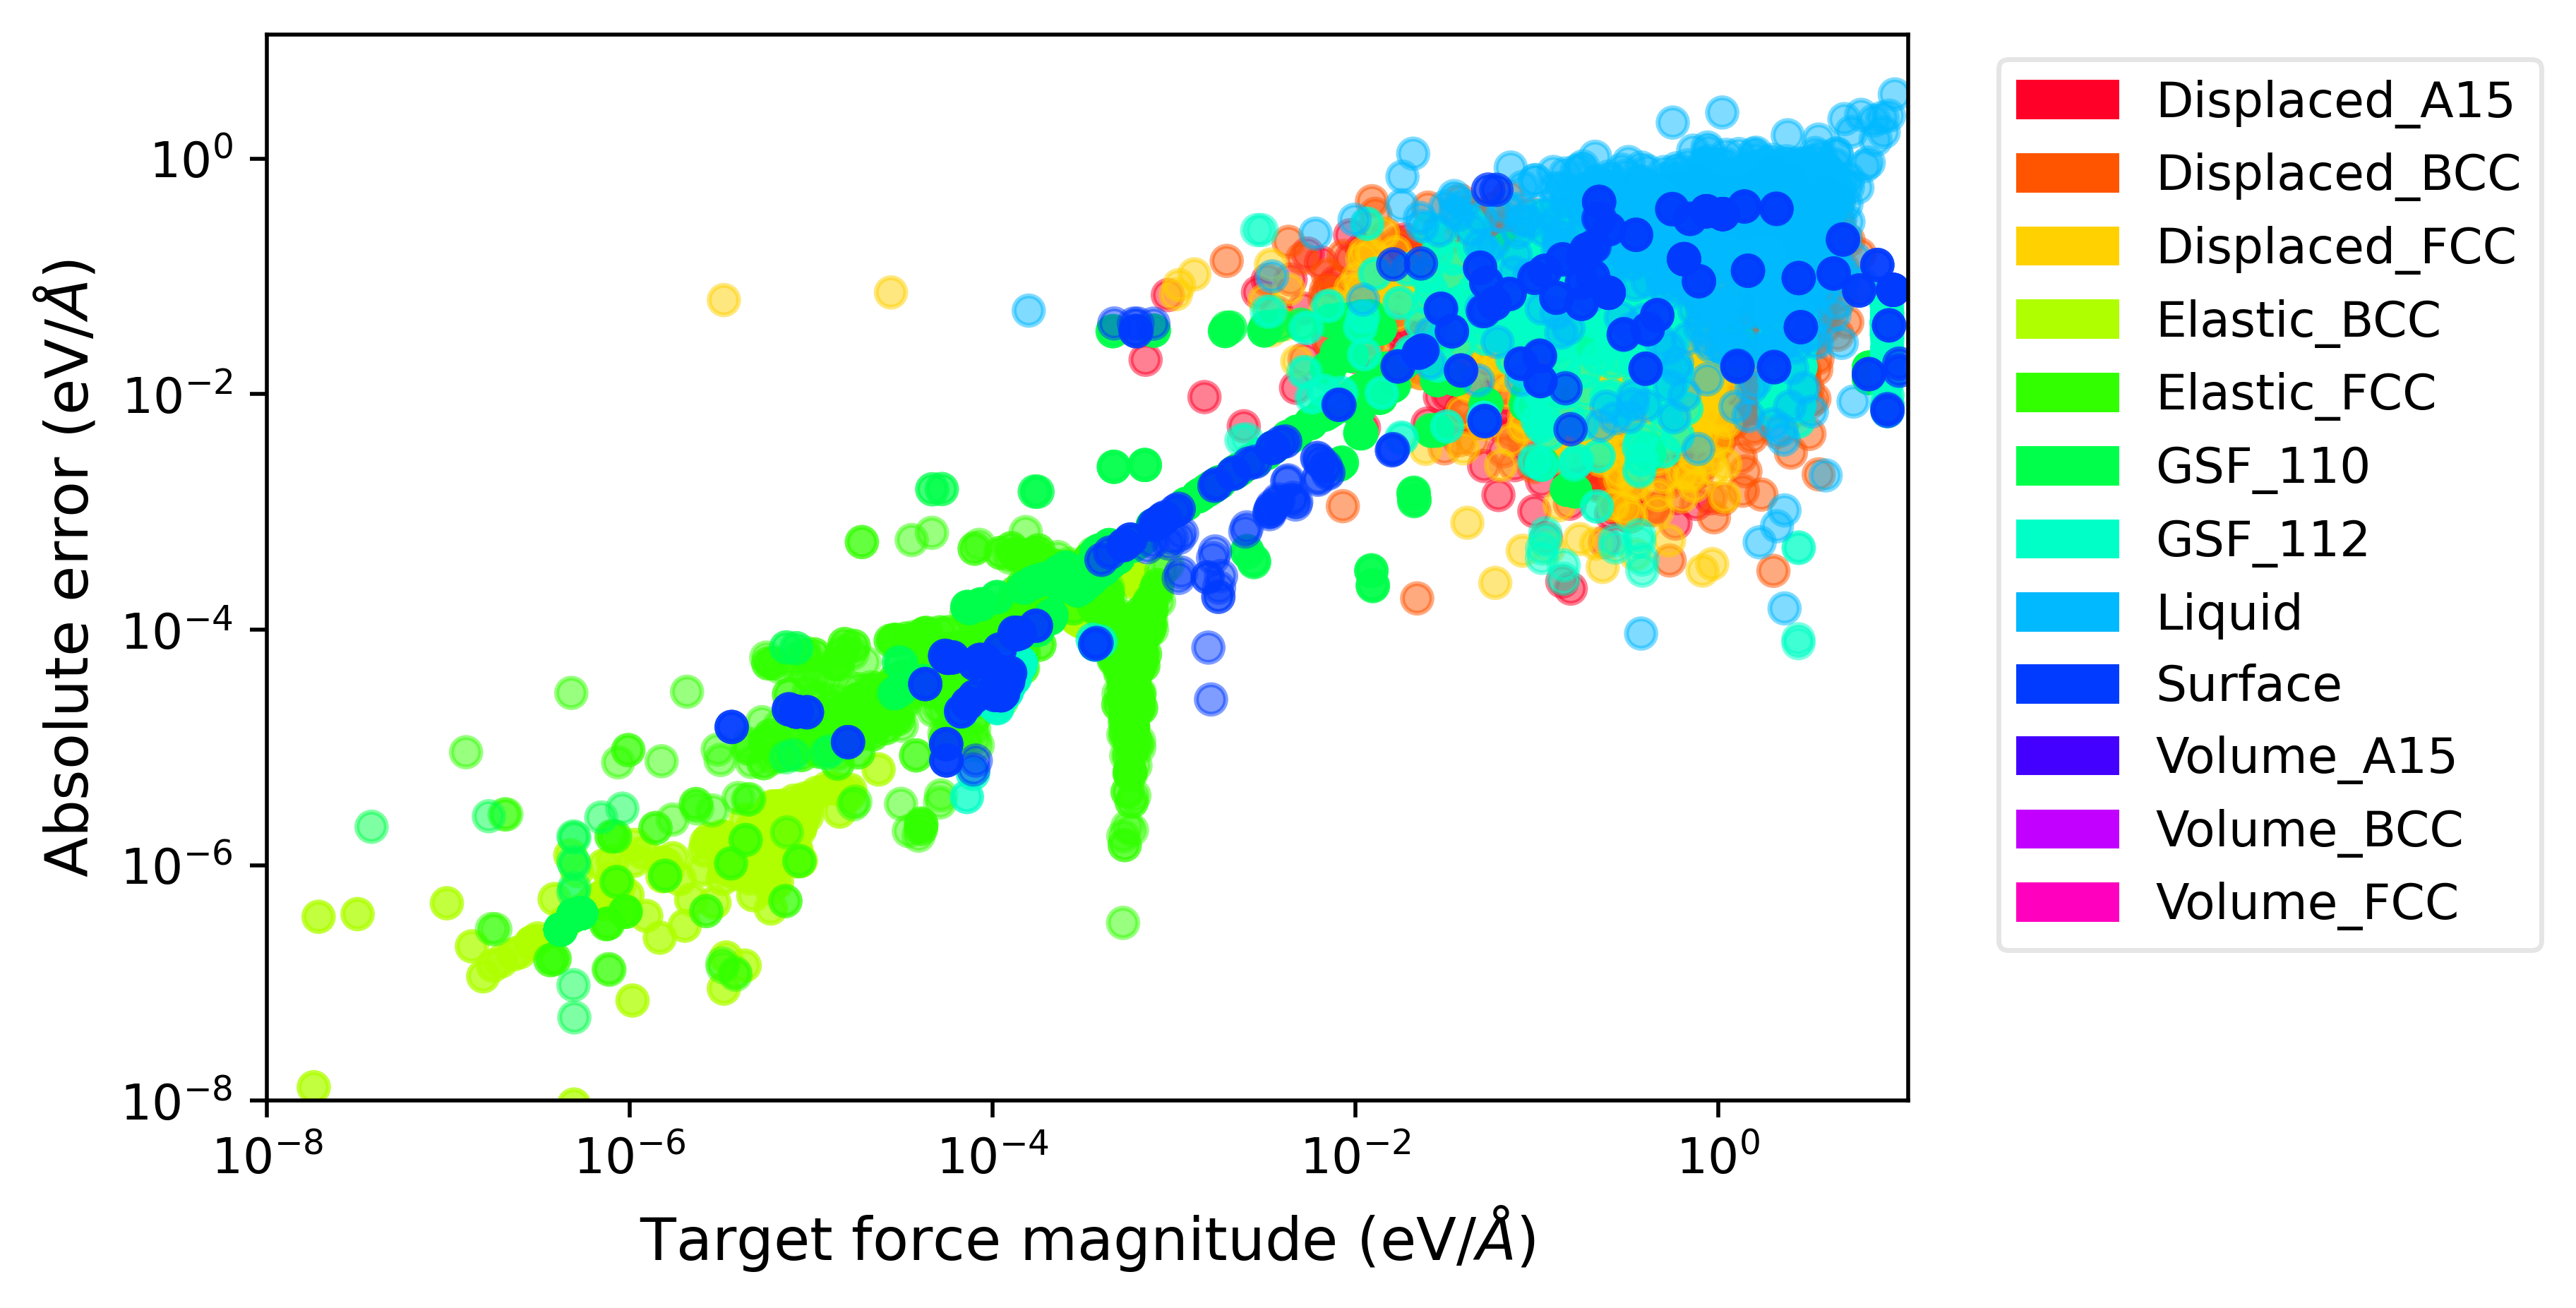

In [22]:
Image('force_agreement.png')

### Using your potential to test errors on another set.

When training, we calculate errors on the training set and a validation set.

Often it is useful to calculate errors on entirely different set (a "test set") after training.

We can use the LAMMPS + FitSNAP Python libraries for this.

To this, we can load your fitted potential into LAMMPS and calculate forces.

In [20]:
%cd /content/FitSNAP/examples/Ta_Linear_JCP2014/

from fitsnap3lib.tools.lammps_tools import LammpsTools

# define pair style, input script, and test directory

pairstyle = """
            pair_style hybrid/overlay zbl 4.0 4.8 snap
            pair_coeff * * zbl 73 73
            pair_coeff * * snap Ta_pot.snapcoeff Ta_pot.snapparam Ta
            """
input_script = "Ta-example.in"
test_dir = "Test_Set_Example"

lmp_tools = LammpsTools(pairstyle, input_script, test_dir, "Energy")
errors = lmp_tools.calculate()

print(f"{'Group':20} {'Energy MAE':3} {'Force MAE':3}")
for group in errors:
    print(f"{group:20} {errors[group]['mae_energy']:.3e} {errors[group]['mae_force']:.3e}")

/content/FitSNAP/examples/Ta_Linear_JCP2014
Using LAMMPSSNAP as FitSNAP calculator
Elastic_FCC_Test : Detected  100  fitting on  100  testing on  0
Displaced_FCC_Test : Detected  9  fitting on  9  testing on  0
'decorated_scrape_configs' took 183.57 ms on rank 0
Group                Energy MAE Force MAE
Displaced_FCC_Test   2.960e-02 5.741e-02
Elastic_FCC_Test     1.447e-02 9.642e-05


Visualize force agreement on this test set

In [ ]:
# plot truth vs. pred

### Perform fit in library mode

Show simple example.

Immediately after fit, let's run MD in the same script. 

This is useful if you want to immediately screen for stability, for example when looping over fits. 

In [37]:
from fitsnap3lib.parallel_tools import ParallelTools
from fitsnap3lib.io.input import Config
pt = ParallelTools()
config = Config(arguments_lst = ["Ta-example.in", "--overwrite"])

# create a fitsnap object

from fitsnap3lib.fitsnap import FitSnap
snap = FitSnap()

# scrape configs, process configs, and perform the fit

snap.scrape_configs()
snap.process_configs()
snap.perform_fit()

print(snap.solver.df)

Using LAMMPSSNAP as FitSNAP calculator
Displaced_A15 : Detected  9  fitting on  9  testing on  0
Displaced_BCC : Detected  9  fitting on  9  testing on  0
Displaced_FCC : Detected  9  fitting on  9  testing on  0
Elastic_BCC : Detected  100  fitting on  100  testing on  0
Elastic_FCC : Detected  100  fitting on  100  testing on  0
GSF_110 : Detected  22  fitting on  22  testing on  0
GSF_112 : Detected  22  fitting on  22  testing on  0
Liquid : Detected  3  fitting on  3  testing on  0
Surface : Detected  7  fitting on  7  testing on  0
Volume_A15 : Detected  30  fitting on  30  testing on  0
Volume_BCC : Detected  21  fitting on  21  testing on  0
Volume_FCC : Detected  31  fitting on  31  testing on  0
'decorated_scrape_configs' took 642.30 ms on rank 0
>>> Matrix of descriptors takes up  0.0277 % of the total memory: 13.6164 GB
'decorated_process_configs' took 3267.57 ms on rank 0
'decorated_perform_fit' took 481.12 ms on rank 0
         0             1             2             3 

Run MD in the same python script!

In [36]:
# run MD

import lammps
lmp = lammps.lammps()

lammps_commands=\
"""
# initialize simulation

variable nsteps index 100
variable nrep equal 4
variable a equal 3.316
units           metal

# generate the box and atom positions using a BCC lattice

variable nx equal ${nrep}
variable ny equal ${nrep}
variable nz equal ${nrep}
boundary        p p p
lattice         bcc $a
region          box block 0 ${nx} 0 ${ny} 0 ${nz}
create_box      1 box
create_atoms    1 box
mass 1 180.88

# choose potential

pair_style hybrid/overlay zbl 4.0 4.8 snap
pair_coeff * * zbl 73 73
pair_coeff * * snap Ta_pot.snapcoeff Ta_pot.snapparam Ta

# setup output

thermo 100
thermo_style    custom step etotal temp pe
compute PE all pe

# set up NVE run

timestep 0.5e-3
neighbor 1.0 bin
neigh_modify once no every 1 delay 0 check yes

# run MD
velocity all create 300.0 4928459 loop geom
fix 1 all nve
run             ${nsteps}
"""

lmp.commands_string(lammps_commands)

# observe energy over a 0.5 ps period

for runs in range(10):
    pe = lmp.numpy.extract_compute("PE", 0, 0)
    print(pe)
    lmp.command("run 100")

-1513.3478867568583
-1514.0631911278838
-1515.163047767227
-1514.6343606546466
-1514.2854786455207
-1514.6391693802423
-1514.7228036399679
-1514.5339732369307
-1514.4168754756156
-1514.7155414339122


### Loop over fits

Standalone example

Can even throw in a MD simulation using the LAMMPS potential.

Make FitSNAP libtool for this?

### Extracting per-atom SNAP descriptors

Need to set `bikflag=1`. 

This is useful if you want to inspect the phase space of your descriptors, do PCA analysis, etc.

Make the following changes to the input script: `bikflag=1`, etc. See chat with David.

Calculate per-atom descriptors without performing a fit:

In [ ]:
# python -m fitsnap3 Ta-example.in --nofit

Now our dataframe contains per-atom descriptors. 



In [ ]:
# from fitsnap3lib.tools.dataframe import df_analyze
# df = load("FitSNAP.df")
# pca = df_analyze(df, "PCA")

We also need per-atom descriptors for NN potentials, which we will do next.

# Fit NN-SNAP for tantalum

In [ ]:
%cd /content/FitSNAP/examples/Ta_PyTorch_NN

/content/FitSNAP/examples/Ta_PyTorch_NN


In [ ]:
!python -m fitsnap3 Ta-example.in --overwrite

CALCULATOR IO ----------
----- Global weights set: Overriding group weights.
----- Global training fraction set: Overriding group fractions.

    ______ _  __  _____  _   __ ___     ____  
   / ____/(_)/ /_/ ___/ / | / //   |   / __ \ 
  / /_   / // __/\__ \ /  |/ // /| |  / /_/ /
 / __/  / // /_ ___/ // /|  // ___ | / ____/ 
/_/    /_/ \__//____//_/ |_//_/  |_|/_/      

-----23Sep22------
Reading input...
Finished reading input
------------------
mpi4py version:  3.1.3
numpy version:  1.21.6
scipy version:  1.7.3
pandas version:  1.3.5
LAMMPS (15 Sep 2022)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
-----------
Total wall time: 0:00:00
Using LAMMPSSNAP as FitSNAP calculator
/usr/local/lib/python3.7/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set a

### Run MD

In [ ]:
%cd /content/FitSNAP/examples/Ta_PyTorch_NN/MD

/content/FitSNAP/examples/Ta_PyTorch_NN/MD


In [ ]:
!/content/lammps/build/lmp < in.run

LAMMPS (15 Sep 2022)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 3.316 3.316 3.316
Created orthogonal box = (0 0 0) to (13.264 13.264 13.264)
  1 by 1 by 1 MPI processor grid
Created 128 atoms
  using lattice units in orthogonal box = (0 0 0) to (13.264 13.264 13.264)
  create_atoms CPU = 0.000 seconds
Loading python model complete.
SNAP keyword rcutfac 4.67637 
SNAP keyword twojmax 6 
SNAP keyword nelems 1 
SNAP keyword elems Ta 
SNAP keyword radelems 0.5 
SNAP keyword welems 1 
SNAP keyword rfac0 0.99363 
SNAP keyword rmin0 0 
SNAP keyword bzeroflag 1 
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 5.8
  ghost atom cutoff = 5.8
  binsize = 2.9, bins = 5 5 5
  2 neighbor lists, perpetual/occasional/extra = 2 0 0
  (1) pair zbl, perpetual
      attributes: half, newton on
  

KeyboardInterrupt: ignored

# Fit NN potential for iron

In [ ]:
%cd /content/FitSNAP/examples/Fe_Pytorch_NN

/content/FitSNAP/examples/Fe_Pytorch_NN


In [ ]:
!python -m fitsnap3 Fe-example.in --overwrite

CALCULATOR IO ----------
----- Global weights set: Overriding group weights.
----- Global training fraction set: Overriding group fractions.

    ______ _  __  _____  _   __ ___     ____  
   / ____/(_)/ /_/ ___/ / | / //   |   / __ \ 
  / /_   / // __/\__ \ /  |/ // /| |  / /_/ /
 / __/  / // /_ ___/ // /|  // ___ | / ____/ 
/_/    /_/ \__//____//_/ |_//_/  |_|/_/      

-----23Sep22------
Reading input...
Finished reading input
------------------
mpi4py version:  3.1.3
numpy version:  1.21.6
scipy version:  1.7.3
pandas version:  1.3.5
LAMMPS (15 Sep 2022)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
-----------
Total wall time: 0:00:00
Using LAMMPSSNAP as FitSNAP calculator
/usr/local/lib/python3.7/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set a

In [ ]:
!lsmod | grep nvidia

nvidia_drm             16384  0
nvidia_uvm            974848  2
nvidia              33898496  31 nvidia_uvm


In [ ]:
!rmmod nvidia_drm
!rmmod nvidia_uvm
!rmmod nvidia_modeset

rmmod: ERROR: ../libkmod/libkmod-module.c:793 kmod_module_remove_module() could not remove 'nvidia_drm': Operation not permitted
rmmod: ERROR: could not remove module nvidia_drm: Operation not permitted
rmmod: ERROR: Module nvidia_uvm is in use
rmmod: ERROR: Module nvidia_modeset is not currently loaded


In [ ]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch


In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
cuda0 = torch.device('cuda:0')
a = torch.ones(3, 2, device=cuda0) #creating a tensor 'a' on GPU
print(a)

1
Tesla T4
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


#Custom calculator

Show how we can extract pure LAMMPS positions and neighlist

This allows one to define their own descriptor and Solver using these positions.

Show library mode plot of descriptors.

# End-to-End Differentiable Potentials